**Business Problem**

The Management team at Walmart Inc. wants to analyse the customer purchase behaviour
(specifically, purchase amount) against the customer’s gender and the various other factors to
help the business make better decisions. They want to understand if the spending habits differ
between male and female customers: Do women spend more on Black Friday than men?
(Assume 50 million customers are male and 50 million are female).

In [ ]:
#Import the libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094

--2024-04-16 08:13:14--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 3.162.130.97, 3.162.130.111, 3.162.130.14, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|3.162.130.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart_data.csv?1641285094’

walmart_data.csv?16 100%[===================>]  21.96M  --.-KB/s    in 0.1s    

2024-04-16 08:13:14 (230 MB/s) - ‘walmart_data.csv?1641285094’ saved [23027994/23027994]



In [ ]:
#Read the Walmart data:

df = pd.read_csv("/content/walmart_data.csv?1641285094")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
#Checking missing values:
df.isnull().sum()/len(df)*100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

In [ ]:
# Checking the data's characteristics
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


**Observations:**

1. **Missing Values**: There are no missing values in the dataset.
2. **Data Types**: All columns are of the correct data type.
3. **Descriptive Statistics**:
    - There are 3631 unique product IDs in the dataset. P00265242 is the most
       sold Product ID.
    - Minimum & Maximum purchase is 12 and 23961 suggests the purchasing
      behaviour is quite spread over a aignificant range of values. Mean is 9264 and 75% of purchase is of less than or equal to 12054. It suggest most of the purchase is not more than 12k.
    - Standard deviation for purchase have significant value which suggests  
      data is more spread out for this attribute.
    
4. **Data Distribution**:
    - The purchase amount is right-skewed, meaning that there are more customers who spend less money than those who spend more money.
5. **Gender**:
    - There are 50 million male and 50 million female customers.
6. **Conclusion**:
    - Based on the above observations, it is not possible to determine whether women spend more on Black Friday than men. Further analysis is required to investigate this question.




In [ ]:
columns=['User_ID','Occupation', 'Marital_Status', 'Product_Category']
df[columns]=df[columns].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


In [ ]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068.0,550068,550068,550068,550068.0,550068,550068,550068.0,550068.0,550068.000000
unique,5891.0,3631,2,7,21.0,3,5,2.0,20.0,NaN
top,1001680.0,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,1026.0,1880,414259,219587,72308.0,231173,193821,324731.0,150933.0,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


Observation post modifying the categorical variables datatype:

1. There are 5891 unique users, and userid 1001680 being with the highest count.
2. The customers belongs to 21 distinct occupation for the purchases being made with Occupation 4 being the highest.
3. Marital status unmarried contribute more in terms of the count for the purchase.
4. There are 20 unique product categories with 5 being the highest.

Value_counts for the following:

* Gender
* Age
* Occupation
* City_Category
* Stay_In_Current_City_Years
* Marital_Status
* Product_Category

In [ ]:
categorical_cols = ['Gender', 'Age', 'Occupation', 'City_Category',
'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
df[categorical_cols].melt().groupby(['variable',
'value'])[['value']].count()/len(df)

value
variable                   value          
Age                        0-17   0.027455
                           18-25  0.181178
                           26-35  0.399200
                           36-45  0.199999
                           46-50  0.083082
                           51-55  0.069993
                           55+    0.039093
City_Category              A      0.268549
                           B      0.420263
                           C      0.311189
Gender                     F      0.246895
                           M      0.753105
Marital_Status             0      0.590347
                           1      0.409653
Occupation                 0      0.126599
                           1      0.086218
                           2      0.048336
                           3      0.032087
                           4      0.131453
                           5      0.022137
                           6      0.037005
                           7      0.107501
                           8      0.002811
                           9      0.011437
                           10     0.023506
                           11     0.021063
                           12     0.056682
                           13     0.014049
                           14     0.049647
                           15     0.022115
                           16     0.046123
                           17     0.072796
                           18     0.012039
                           19     0.015382
                           20     0.061014
Product_Category           1      0.255201
                           2      0.043384
                           3      0.036746
                           4      0.021366
                           5      0.274390
                           6      0.037206
                           7      0.006765
                           8      0.207111
                           9      0.000745
                           10     0.009317
                           11     0.044153
                           12     0.007175
                           13     0.010088
                           14     0.002769
                           15     0.011435
                           16     0.017867
                           17     0.001051
                           18     0.005681
                           19     0.002914
                           20     0.004636
Stay_In_Current_City_Years 0      0.135252
                           1      0.352358
                           2      0.185137
                           3      0.173224
                           4+     0.154028

**Observations:**
* ~ 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)
* 75% of the users are Male and 25% are Female
* 60% Single, 40% Married
* 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
* Total of 20 product categories are there
* There are 20 different types of occupations in the city

**3: Visual Analysis - Univariate & Bivariate**
**Univariate**
* For continuous variable(s): Boxplot, histogram for univariate analysis:
Understanding the distribution of data and detecting outlies for continuous
variables

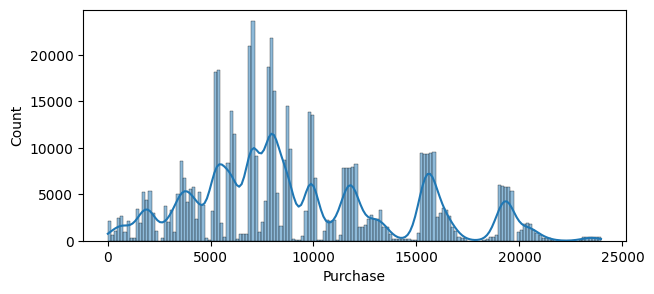

In [ ]:
plt.figure(figsize=(7, 3))
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

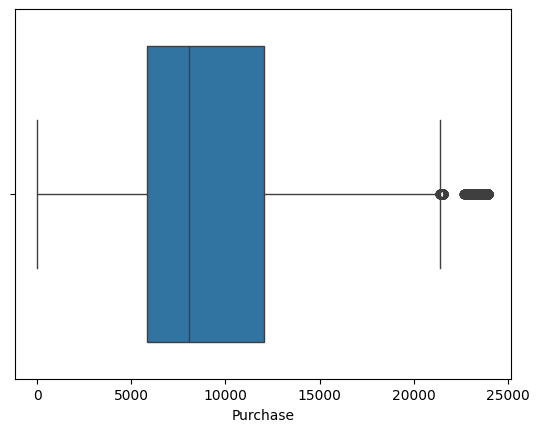

In [ ]:
sns.boxplot(data=df, x='Purchase', orient='h')
plt.show()

**Observations:**

* The purchase amount is right-skewed, meaning that there are more customers who spend less money than those who spend more money.
* The median purchase amount is around $9,000.

* There are a few outliers who spend more than $20,000.

**Possible explanations:**

* The right-skewed distribution could be due to a few high-value customers who spend a lot of money on Black Friday.
* The outliers could be due to customers who purchased expensive items, such as electronics or appliances.

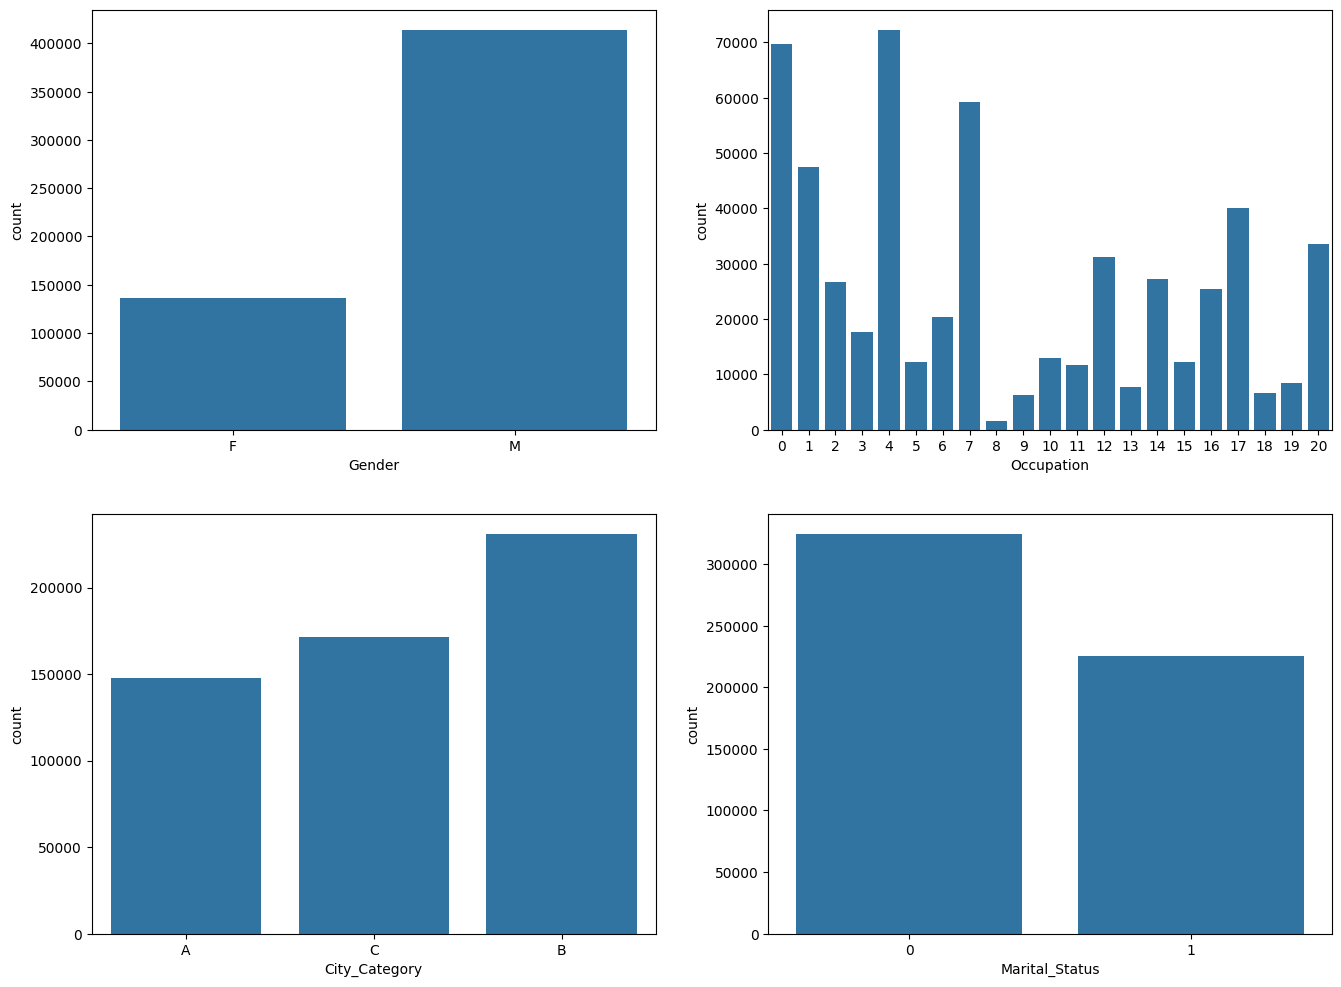

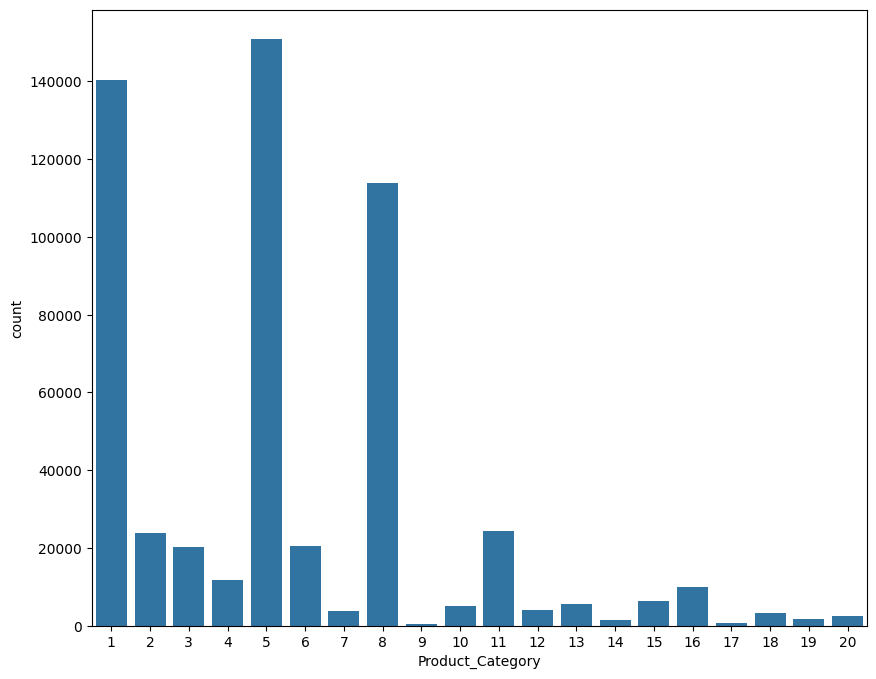

In [ ]:
categorical_cols = ['Gender', 'Occupation', 'City_Category', 'Marital_Status', 'Product_Category']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.countplot(data=df, x='Gender', ax=axs[0,0])
sns.countplot(data=df, x='Occupation', ax=axs[0,1])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1])
plt.show()
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Product_Category')
plt.show()

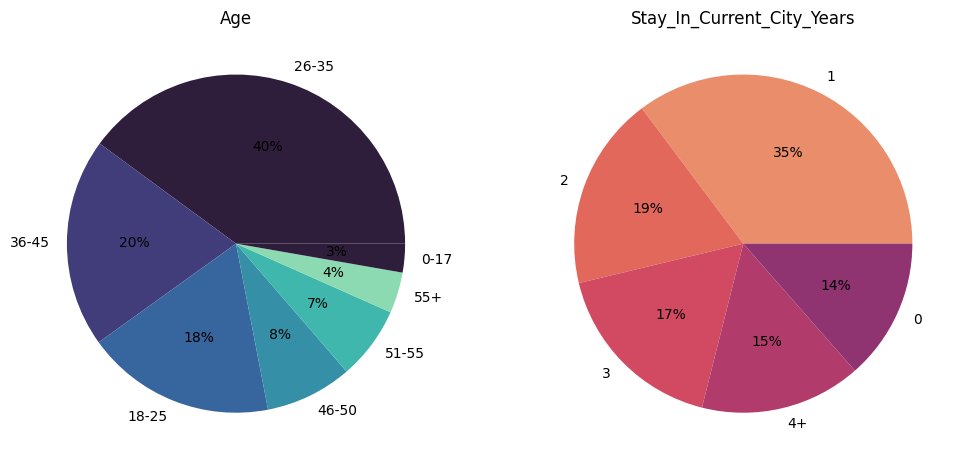

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
data = df['Age'].value_counts(normalize=True)*100
palette_color = sns.color_palette('mako')
axs[0].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[0].set_title("Age")
data = df['Stay_In_Current_City_Years'].value_counts(normalize=True) * 100
palette_color = sns.color_palette('flare')
axs[1].pie(x=data.values, labels=data.index, autopct='%.0f%%',
colors=palette_color)
axs[1].set_title("Stay_In_Current_City_Years")

plt.show()


**Observations**
* Most of the users are Male
* There are 20 different types of Occupation and Product_Category
* More users belong to B City_Category
* More users are Single as compare to Married
* Product_Category - 1, 5, 8, & 11 have highest purchasing frequency.

**Bivariate**

<ipython-input-27-1d697b5ea58a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row,
<ipython-input-27-1d697b5ea58a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row,
<ipython-input-27-1d697b5ea58a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row,
<ipython-input-27-1d697b5ea58a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

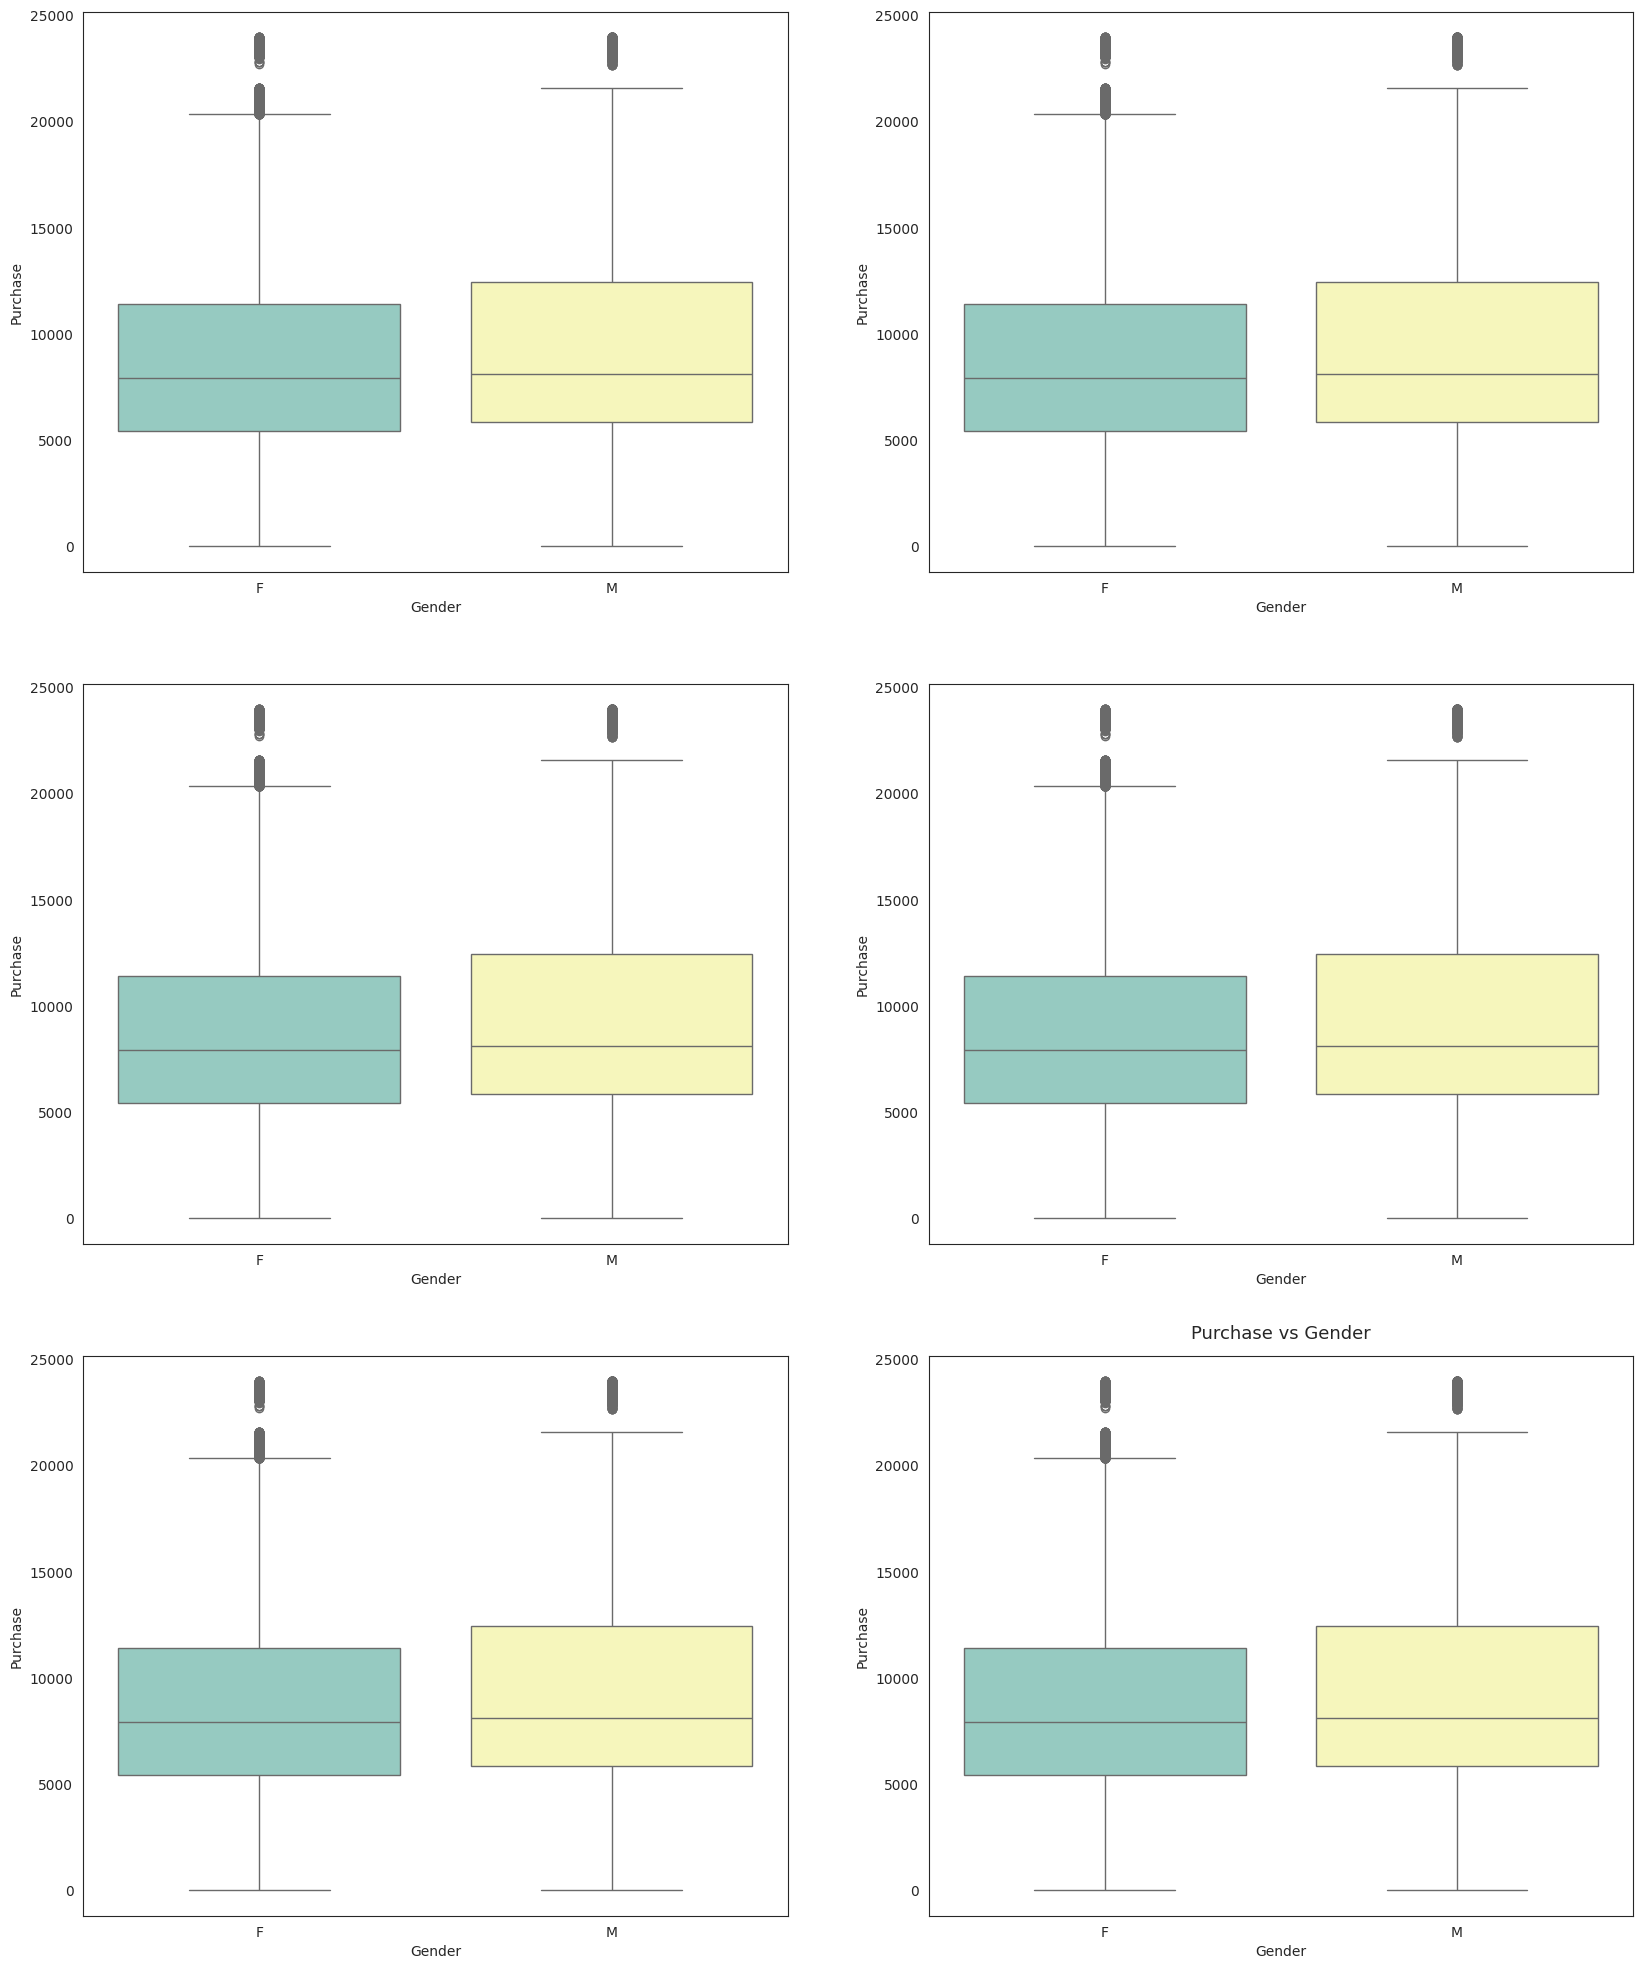

<ipython-input-27-1d697b5ea58a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x=attrs[-1], palette='Set3')


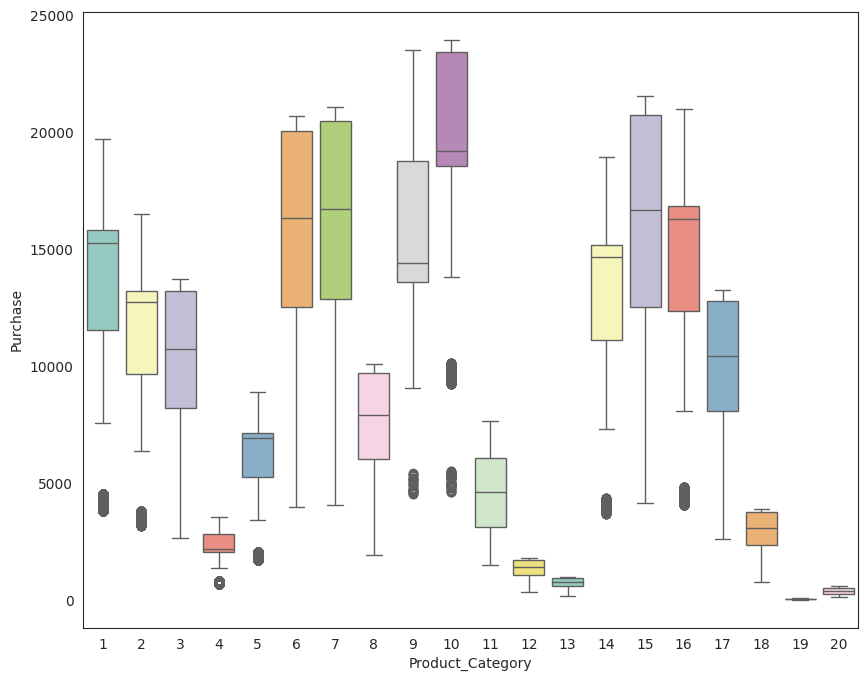

In [ ]:
attrs = ['Gender', 'Age', 'Occupation', 'City_Category',
'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
sns.set_style("white")
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
  for col in range(2):
    sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row,
col], palette='Set3')
axs[row,col].set_title(f"Purchase vs {attrs[count]}", pad=12,
fontsize=13)
count += 1
plt.show()
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y='Purchase', x=attrs[-1], palette='Set3')
plt.show()

**Missing Value & Outlier Detection **bold text**

Missing Value:

In [ ]:
print(df.isnull().sum())

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64


**Observations**
* There are no missing values in the dataset.

**Using pandas describe() to find outliers:**

In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


**Observation:**

Purchase amount might have outliers.: the max Purchase amount is 23961 while its
mean is 9263.96. The mean is sensitive to outliers, but the fact the mean is so small
compared to the max value indicates the max value is an outlier

**Visualize outliers**

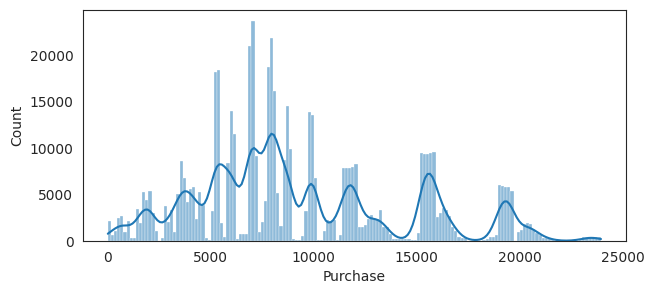

In [ ]:
plt.figure(figsize=(7, 3))
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

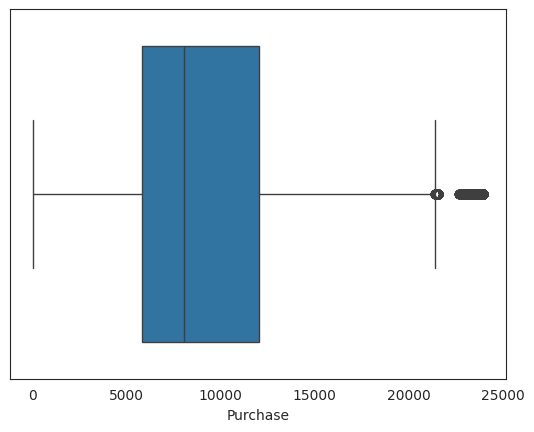

In [ ]:
sns.boxplot(data=df, x='Purchase', orient='h')
plt.show()

**Observation**
* Purchase is having outliers

**Using the convenient pandas .quantile() function**

In [ ]:
#create a function to find outliers using IQR
def find_outliers_IQR(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  IQR=q3-q1
  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
  return outliers
outliers = find_outliers_IQR(df["Purchase"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value:"+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers: 2677
max outlier value:23961
min outlier value: 21401


1. Are women spending more money per transaction than men? Why or Why not?
Average amount spends per customer for Male and Female

In [ ]:
amt_df = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df.head()

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001


In [ ]:
# Gender wise value counts in avg_amt_df
avg_amt_df = pd.DataFrame({'Gender': ['Male', 'Female', 'Male', 'Female', 'Male']})

avg_amt_df['Gender'].value_counts()

Gender
Male      3
Female    2
Name: count, dtype: int64

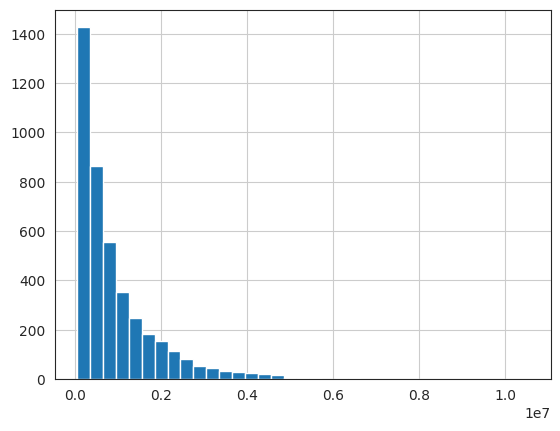

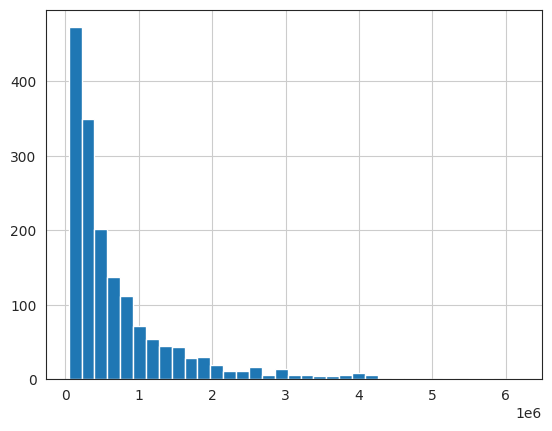

In [ ]:
# histogram of average amount spend for each customer - Male & Female
amt_df[amt_df['Gender']=='M']['Purchase'].hist(bins=35)
plt.show()
amt_df[amt_df['Gender']=='F']['Purchase'].hist(bins=35)
plt.show()

In [ ]:
male_avg = amt_df[amt_df['Gender']=='M']['Purchase'].mean()
female_avg = amt_df[amt_df['Gender']=='F']['Purchase'].mean()
print("Average amount spent by Male customers: {:.2f}".format(male_avg))
print("Average amount spent by Female customers: {:.2f}".format(female_avg))

Average amount spent by Male customers: 925344.40
Average amount spent by Female customers: 712024.39


**Observation**
* Male customers spend more money than female customers

2. Confidence intervals and distribution of the mean of the expenses by female and
male customers

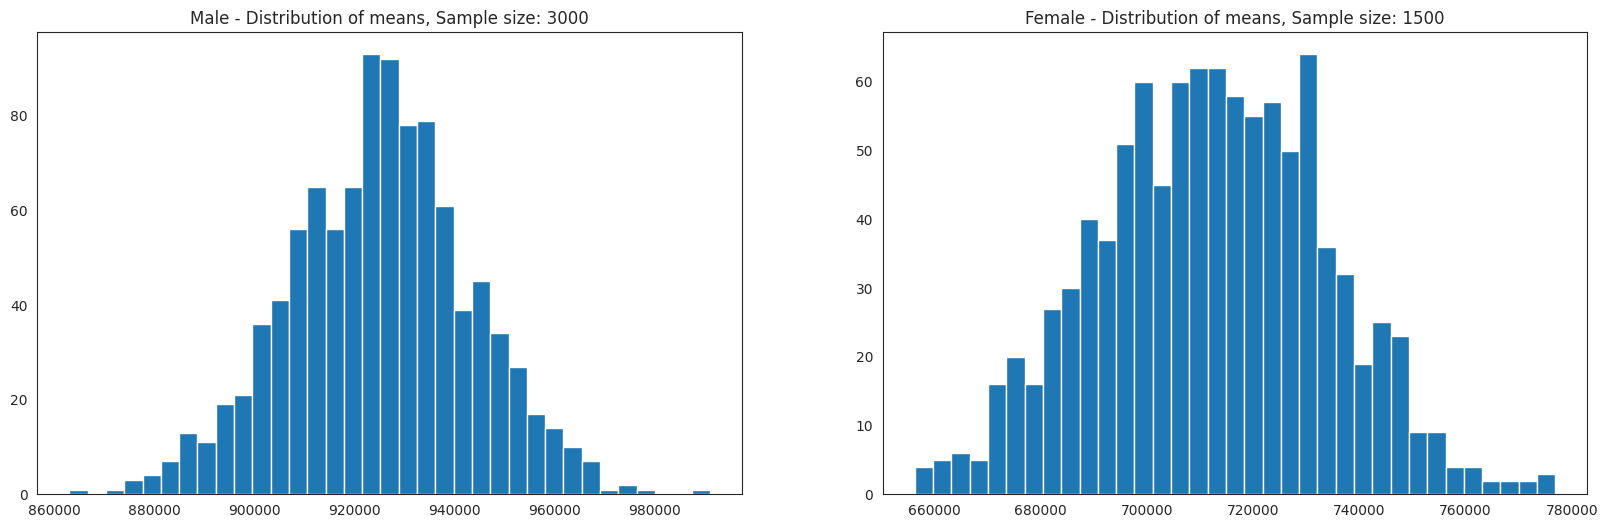

In [ ]:
male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']
genders = ["M", "F"]
male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []
for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size,
                               replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size,
                                  replace=True)['Purchase'].mean()
    male_means.append(male_mean)
    female_means.append(female_mean)
#######################################################################
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].set_title("Female - Distribution of means, Sample size: 1500")
plt.show()

In [ ]:
print("Population mean - Mean of sample means of amount spend for Male:\n{:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female:\n{:.2f}".format(np.mean(female_means)))
print("\nFemale - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))
print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample std: {:.2f}".format(female_df['Purchase'].std()))


Population mean - Mean of sample means of amount spend for Male:
925117.20
Population mean - Mean of sample means of amount spend for Female:
712180.89

Female - Sample mean: 712024.39 Sample std: 807370.73

Male - Sample mean: 925344.40 Sample std: 985830.10
Female - Sample std: 807370.73


**Observation**

Now using the Central Limit Theorem for the population we can say that:
1. Average amount spend by male customers is 9,26,341.86
2. Average amount spend by female customers is 7,11,704.09

3: Are confidence intervals of average male and female spending overlapping? How can Walmart
leverage this conclusion to make changes or improvements?

In [ ]:
male_margin_of_error_clt = 1.96 * male_df['Purchase'].std() / np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt
female_margin_of_error_clt =1.96*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt
print("Male confidence interval of means: ({:.2f},{:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (895617.83,955070.97)
Female confidence interval of means: (673254.77, 750794.02)


4: Confidence intervals and distribution of the mean of the expenses by female and
male customers

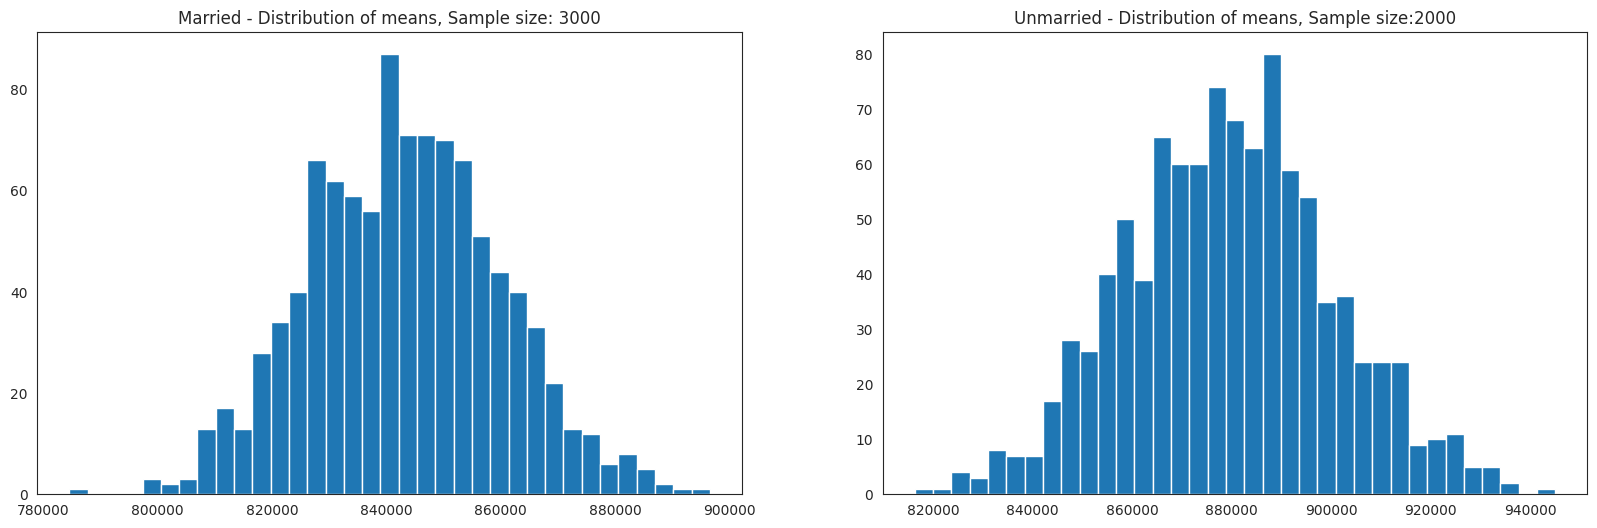

Population mean - Mean of sample means of amount spend for Married: 843099.82
Population mean - Mean of sample means of amount spend for Unmarried: 879447.61

Married - Sample mean: 843526.80 Sample std:935352.12
Unmarried - Sample mean: 880575.78 Sample std: 949436.25
Married confidence interval of means: (806668.83,880384.76)
Unmarried confidence interval of means: (848741.18,912410.38)


In [ ]:
amt_df = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df
amt_df['Marital_Status'].value_counts()
marid_samp_size = 3000
unmarid_sample_size = 2000
num_repitions = 1000
marid_means = []

unmarid_means = []
for _ in range(num_repitions):
  marid_mean = amt_df[amt_df['Marital_Status']==1].sample(marid_samp_size,replace=True)['Purchase'].mean()
  unmarid_mean =amt_df[amt_df['Marital_Status']==0].sample(unmarid_sample_size, replace=True)['Purchase'].mean()
  marid_means.append(marid_mean)
  unmarid_means.append(unmarid_mean)

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size:2000")

plt.show()

print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))
print("\nMarried - Sample mean: {:.2f} Sample std:{:.2f}".format(amt_df[amt_df['Marital_Status']==1]['Purchase'].mean(),amt_df[amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==0]['Purchase'].mean(),amt_df[amt_df['Marital_Status']==0]['Purchase'].std()))

for val in ["Married", "Unmarried"]:
  new_val = 1 if val == "Married" else 0
  new_df = amt_df[amt_df['Marital_Status']==new_val]
  margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
  sample_mean = new_df['Purchase'].mean()
  lower_lim = sample_mean - margin_of_error_clt
  upper_lim = sample_mean + margin_of_error_clt
  print("{} confidence interval of means: ({:.2f},{:.2f})".format(val, lower_lim, upper_lim))

In [ ]:
amt_df = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df
amt_df['Age'].value_counts()
sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+',
'0-17']
for age_interval in age_intervals:
  all_means[age_interval] = []

for age_interval in age_intervals:
  for _ in range(num_repitions):
    mean = amt_df[amt_df['Age']==age_interval].sample(sample_size,replace=True)['Purchase'].mean()
    all_means[age_interval].append(mean)

for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
  new_df = amt_df[amt_df['Age']==val]
  margin_of_error_clt =1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
  sample_mean = new_df['Purchase'].mean()
  lower_lim = sample_mean - margin_of_error_clt
  upper_lim = sample_mean + margin_of_error_clt

  print("For age {} --> confidence interval of means: ({:.2f},{:.2f})".format(val, lower_lim, upper_lim))





For age 26-35 --> confidence interval of means: (945034.42,1034284.21)
For age 36-45 --> confidence interval of means: (823347.80,935983.62)
For age 18-25 --> confidence interval of means: (801632.78,908093.46)
For age 46-50 --> confidence interval of means: (713505.63,871591.93)
For age 51-55 --> confidence interval of means: (692392.43,834009.42)
For age 55+ --> confidence interval of means: (476948.26,602446.23)
For age 0-17 --> confidence interval of means: (527662.46,710073.17)







**Insight and Recommendations based on the analysis:**



1. **Insights from the Analysis:**

   * **Gender and Spending:** Contrary to the initial assumption, the analysis revealed that male customers spend more money per transaction than female customers, on average.The average amount spent by male customers is 9,26,341.86.
The average amount spent by female customers is 7,11,704.09.
   * **Confidence Intervals:** The confidence intervals for the average spending of male and female customers overlap, suggesting that the difference in spending habits between the two groups might not be statistically significant.
   * **Marital Status and Spending:** Married customers tend to spend more money than unmarried customers, on average.
   * **Age and Spending:** Customers in the age group of 26-35 spend the most, followed by customers in the age group of 36-45. Customers in the age group of 0-17 spend the least.

**2.Additional insights:**

   * Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.

   * Some of the Product category like 19,20,13 have very less purchase. Company can think of dropping it.

   * The top 10 users who have purchased more company should give more offers and discounts so that they can be retained and can be helpful for companies business.

   * The occupation which are contributing more company can think of offering credit cards or other benefits to those customers by liasing with some financial partners to increase the sales.

   * The top products should be given focus in order to maintain the quality in order to further increase the sales of those products.

   * People who are staying in city for an year have contributed to 35% of the total purchase amount. Company can focus on such customer base who are neither too old nor too new residents in the city.

   * We have highest frequency of purchase order between 5k and 10k, company can focus more on these mid range products to increase the sales.


2. **Recommendations for Walmart:**

   * **Targeted Marketing Campaigns:** Walmart can use the insights from this analysis to create targeted marketing campaigns for different customer segments. For example, they can target male customers with higher-priced products and female customers with value-for-money products.
   * **Product Assortment:** Walmart can adjust its product assortment based on the spending habits of different customer segments. For example, they can stock more high-priced products in areas with a higher concentration of male customers and more value-for-money products in areas with a higher concentration of female customers.
   * **Pricing Strategy:** Walmart can adjust its pricing strategy based on the spending habits of different customer segments. For example, they can offer higher discounts on products that are popular among male customers and lower discounts on products that are popular among female customers.
   * **Loyalty Programs:** Walmart can create loyalty programs that are tailored to the needs of different customer segments. For example, they can offer different rewards and benefits to male and female customers.

3. **Further Analysis:**

   * **Additional Factors:** The analysis could be further expanded by considering additional factors such as income, education level, and occupation.
   * **Segmentation:** The customer base could be segmented into smaller groups based on a combination of factors such as gender, age, marital status, and spending habits.
   * **Prediction:** Predictive models could be built to identify customers who are likely to spend more money in the future.